In [292]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [293]:
# Load the dataset
dataset = pd.read_csv('train.csv')
dataset.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [294]:
dataset.isnull().sum()

year             0
month            0
day              0
latitude         0
longitude        0
zon.winds    14570
mer.winds    14570
humidity     38794
air temp.     7838
s.s.temp.        0
dtype: int64

In [295]:
# Dropping unnecessary columns and filling nan
dataset = dataset.drop(['year', 'month', 'day'], axis=1)
dataset.fillna(dataset.mode(), inplace=True)


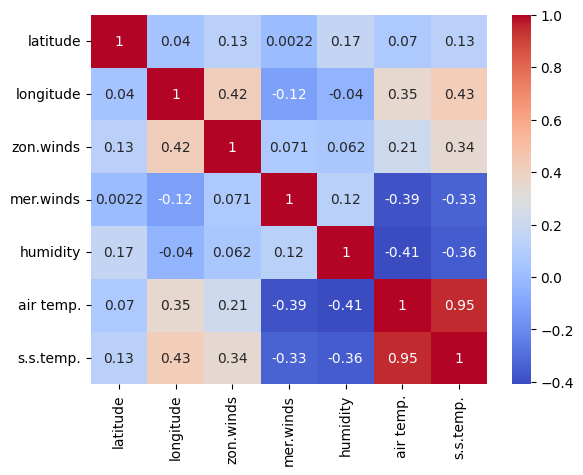

In [296]:
# Plotting correlation matrix
import seaborn as sb
dp = sb.heatmap(dataset.corr(), cmap='coolwarm', annot=True)
plt.show()

In [297]:
# Separate features (X) and target variable (y)
x = dataset[['latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.']]
y = dataset['s.s.temp.']


In [298]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [299]:
# Feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [300]:
# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=1)


In [301]:
# Train the model
xgb_model.fit(x_train, y_train)

# Predicting test results
y_pred = xgb_model.predict(x_test)


In [302]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.15925382152794376
R-squared: 0.9660458553375562


In [303]:
# Model score (R²)
model_score = xgb_model.score(x_test, y_test)
print(f"Model Score (R²): {model_score}")


Model Score (R²): 0.9660458553375562


In [304]:
# Results dataframe
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results_df)

       Actual  Predicted
52962   24.58  24.888542
33278   29.30  29.253817
97517   29.08  28.807051
50626   29.16  29.276346
29311   29.19  28.412712
...       ...        ...
20311   28.33  28.304882
46240   28.88  28.826084
79427   24.73  24.190573
27358   22.61  22.609674
42215   28.77  29.246073

[20882 rows x 2 columns]


In [305]:
# after model selection, a new model shall be trained

In [306]:
model_final = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=1)

In [307]:
model_final.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [308]:
df_eval = pd.read_csv('data_1997_1998(1).csv')

In [309]:
df_eval.isnull().sum()

Index           0
year            0
month           0
day             0
latitude        0
longitude       0
zon.winds    4897
mer.winds    4897
humidity     4878
air temp.    2803
dtype: int64

In [310]:
df_eval = df_eval.fillna(df_eval.mean())

In [311]:
df_eval.isnull().sum()

Index        0
year         0
month        0
day          0
latitude     0
longitude    0
zon.winds    0
mer.winds    0
humidity     0
air temp.    0
dtype: int64

In [312]:
df_eval = df_eval.drop(['year', 'month', 'day','Index'],axis=1)

In [313]:
df_eval_prepared=sc.transform(df_eval)

In [314]:
df_eval.isnull().sum()

latitude     0
longitude    0
zon.winds    0
mer.winds    0
humidity     0
air temp.    0
dtype: int64

In [315]:
df_eval.head()

,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,0.07,-110.0,-3.1,1.4,89.6,22.66
1,0.07,-110.0,-2.8,3.0,86.8,22.45
2,0.07,-110.0,-5.2,3.3,85.2,22.14
3,0.07,-110.0,-5.7,1.6,86.8,22.19
4,0.07,-110.0,-5.1,1.5,83.6,22.34


In [316]:
preds_eval = model_final.predict(df_eval)

In [317]:
df_temp = pd.DataFrame(preds_eval)

In [318]:
df_eval = pd.concat([df_eval,df_temp],axis=1)

In [319]:
df_eval = df_eval.drop(['latitude','longitude','zon.winds','mer.winds','humidity','air temp.'],axis=1)

In [320]:
df_eval

,0
0,22.760721
1,22.643673
2,22.565237
3,22.185839
4,22.579765
...,...
32309,28.196562
32310,27.555037
32311,27.712732
32312,28.089426


In [321]:
df_eval = df_eval.rename(columns={0:'predictions'})

In [322]:
df_eval

,predictions
0,22.760721
1,22.643673
2,22.565237
3,22.185839
4,22.579765
...,...
32309,28.196562
32310,27.555037
32311,27.712732
32312,28.089426


In [323]:
df_eval.to_csv('output(1)_1997-1998.csv')

In [324]:
#Predicting sea surface temperature of evaluation.csv
dataset_2 = pd.read_csv(r'evaluation(2).csv')

In [325]:
dataset_2.head()

,Unnamed: 0,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,0,1995,6,22,2.00,165.0,-3.3,-1.9,79.4,28.95
1,1,1995,1,13,4.99,156.0,-3.5,-2.2,82.0,27.86
2,2,1995,7,9,-4.97,-125.0,-8.2,1.5,84.2,26.02
3,3,1996,7,17,8.01,165.0,-5.4,-1.0,84.1,28.38
4,4,1993,8,23,2.06,165.0,2.0,0.6,75.4,28.47


In [326]:
dataset_2 = dataset_2.drop(['Unnamed: 0','year','day','month'],axis=1)

In [327]:
dataset_2_prepared = sc.transform(dataset_2)

In [328]:
dataset_2.isnull().sum()

latitude        0
longitude       0
zon.winds    3683
mer.winds    3683
humidity     9738
air temp.    2047
dtype: int64

In [329]:
dataset_2 = dataset_2.fillna(dataset_2.mean())

In [330]:
dataset_2.isnull().sum()

latitude     0
longitude    0
zon.winds    0
mer.winds    0
humidity     0
air temp.    0
dtype: int64

In [331]:
preds_2 = model_final.predict(dataset_2)

In [332]:
df_temp = pd.DataFrame(preds_2)

In [333]:
dataset_2 = pd.concat([dataset_2,df_temp],axis =1)

In [334]:
dataset_2=dataset_2.drop(['latitude','longitude','zon.winds','mer.winds','humidity','air temp.'],axis=1)

In [335]:
dataset_2

,0
0,29.719898
1,29.155924
2,26.304180
3,29.066841
4,29.715956
...,...
26098,28.356936
26099,29.752281
26100,29.370956
26101,29.136501


In [336]:
dataset_2 = dataset_2.rename(columns={0:'Predictions'})

In [337]:
dataset_2.to_csv('output(2)_evaluation.csv')

In [338]:
dataset_2.head()

,Predictions
0,29.719898
1,29.155924
2,26.304180
3,29.066841
4,29.715956


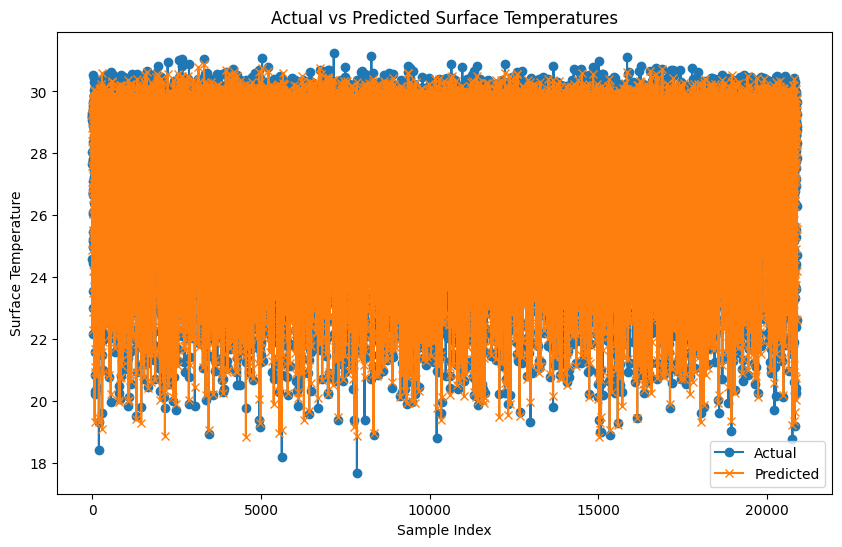

In [339]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Surface Temperatures')
plt.xlabel('Sample Index')
plt.ylabel('Surface Temperature')
plt.legend()
plt.show()